In [16]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [24]:
data_image = 'fashion-data/images/'
data_anno = 'fashion-data/annotation/'

data_image_train = data_image + 'train2020/train/'
# data_anno_train = data_anno + 'attributes_train2020.json'
data_anno_train = data_anno + 'instances_attributes_train2020.json'

image name: e58dcb4868d2cec513dbfa9e81015126.jpg


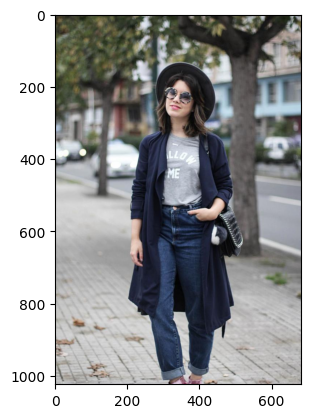

In [31]:
img_list = os.listdir(data_image_train)
rand_img = random.choice(img_list)

img = Image.open(data_image_train + rand_img)

print(f'image name: {rand_img}')
plt.imshow(img)

In [32]:
with open(data_anno_train) as f:
    train_anno = json.load(f)

train_anno.keys()

dict_keys(['annotations', 'images', 'info', 'licenses', 'categories', 'attributes'])

In [33]:
def get_image_infor(image_name, anno):
    for item in anno['images']:
        if(image_name == item['file_name']):
            return item
        
def get_image_anno(image_id, anno):
    for item in anno['annotations']:
        if(item['image_id'] == image_id):
            return item

def get_image_attributes(id_atts, anno_att):
    image_attributes = [{'id': item['id'], 'name': item['name']} for item in anno_att if item['id'] in id_atts]
    return image_attributes

In [34]:
image_infor = get_image_infor(rand_img, train_anno)
image_infor

{'id': 29418,
 'width': 682,
 'height': 1024,
 'file_name': 'e58dcb4868d2cec513dbfa9e81015126.jpg',
 'license': 3,
 'time_captured': 'September-December, 2018',
 'original_url': 'http://farm1.staticflickr.com/640/22569916710_fd28d018f1_n.jpg',
 'isstatic': 1,
 'kaggle_id': 'e58dcb4868d2cec513dbfa9e81015126'}

In [35]:
image_anno = get_image_anno(image_infor['id'], train_anno)
image_anno

{'image_id': 29418,
 'category_id': 14,
 'attribute_ids': [],
 'segmentation': [[413,
   298,
   415,
   285,
   409,
   263,
   410,
   241,
   404,
   212,
   394,
   183,
   384,
   168,
   365,
   160,
   343,
   163,
   320,
   172,
   312,
   180,
   301,
   206,
   293,
   233,
   287,
   249,
   278,
   229,
   276,
   203,
   281,
   176,
   294,
   153,
   311,
   139,
   332,
   133,
   356,
   133,
   375,
   136,
   400,
   150,
   421,
   170,
   433,
   188,
   441,
   214,
   443,
   240,
   436,
   267,
   427,
   284,
   418,
   295]],
 'bbox': [276.0, 133.0, 167.0, 165.0],
 'area': 8754,
 'iscrowd': 0,
 'id': 247790}

In [30]:
image_attributes = get_image_attributes(image_anno['attribute_ids'], train_anno['attributes'])
image_attributes

[{'id': 115, 'name': 'symmetrical'},
 {'id': 146, 'name': 'above-the-hip (length)'},
 {'id': 225, 'name': 'single breasted'},
 {'id': 316, 'name': 'no special manufacturing technique'},
 {'id': 317, 'name': 'plain (pattern)'}]

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)

x, y, w, h = box
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)